# Sentiment Analysis in Python

Techniques we will use in this notebook:

1. VADER (Valence Aware DIctionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from Hugging Face


The main idea of this project is to run sentiment analysis on the `Text` column of our data set

# Step 1: Read in data and NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv('Reviews.csv')
# Take a look at a few of the reviews
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Variables:

`Id`= The specific id for each review <br>
`ProductId`= The specific id for the product the reviwer is reviewing <br>
`UserId`= The specific id for the profile of the reviewer <br>
`ProfileName`= The specific profile name of the reviewer <br>
`HelpfulnessNumerator`= <br>
`HelpfulnessDenominator`= <br>
`Score`= The overall score (1-5) the reviewer scored the product <br>
`Time`= <br>
`Summary`= Summary of text review written by reviewer <br>
`Text`= The full review written by the reviewer<br>



Now let's take a look at the size of our dataset

In [3]:
print(df.shape)

(568454, 10)


This dataset is quite large, over 500,000 observations. Thus, we will downsample this dataset and only work with 500 observations for time-sake.

In [4]:
df = df.head(500)
print(df.shape)

(500, 10)


## Visual EDA

Let's first look at a barplot of the scores of these Amazon reviews

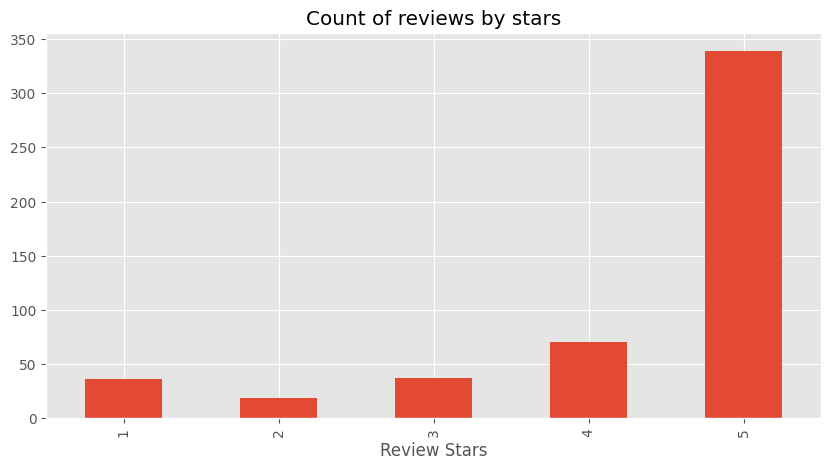

In [5]:
score_plot = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars', 
                                             figsize = (10,5),)

score_plot.set_xlabel('Review Stars')
plt.show()

As we can see, most of the reviews are 5 stars, with a small uptick in reviews that contain a score of 1 star. 
Biased towards positive reviews.

Below is a plot of the number of reviews for each Product in our dataset

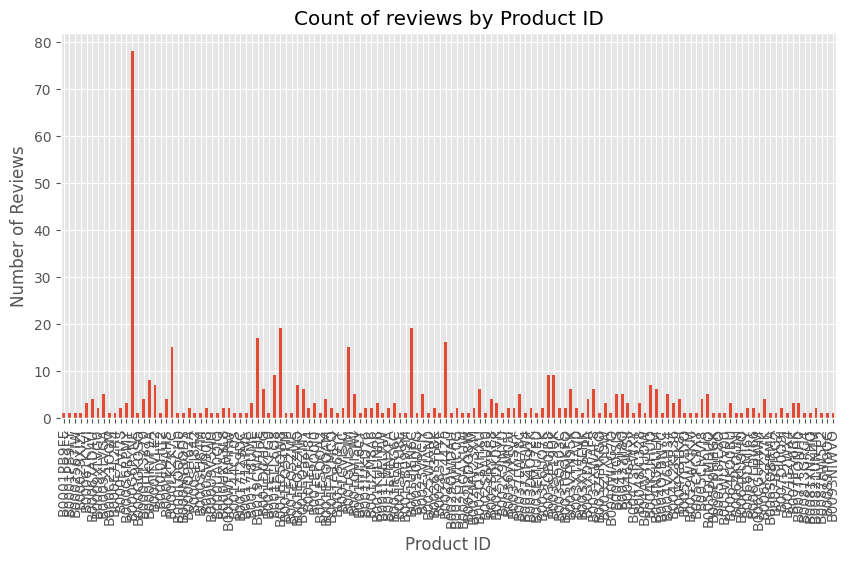

In [6]:
product_plot = df.groupby('ProductId').size().sort_index().plot(kind='bar', title='Count of reviews by Product ID', 
                                                             figsize=(10, 5))

product_plot.set_xlabel('Product ID')
product_plot.set_ylabel('Number of Reviews')
plt.show()


## Basic NLTK

Let's first take an exmaple, say the 50th observation

In [7]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


Now, let's tokenize the sentence so that the computer is able to interpret

In [8]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
tokens = nltk.word_tokenize(example)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


Now, let's look at the part of speech for each of these words

In [10]:
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
print(tagged)

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), ('Quaker', 'NNP'), ('Oats', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\arman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Now we can take these tagged part of speech and put them into entities. Using `nltk.chunk.ne_chunk()` to chunk the given list of tagged tokens

In [11]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\arman\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\arman\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


We can see that it has chunked this into a sentence and noted the organization in the text.

## Step 1: VADER Sentiment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the negative, neutral, and positive scores of each text.

This will use a "bag of words" approach:
1. Stop words are removed
2. Each word is scored and combined to a total score

One of the cons of this approach is that it does not account for relationships between words, which in human speech is very important, but it is a good start.

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm

Now we will make out sentiment analyzer object

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sia = SentimentIntensityAnalyzer()
sia

Let's run some examples

First, a positive statement

In [16]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

Second, a neutral statement

In [17]:
sia.polarity_scores('This is a product.')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Third, a negative statement

In [18]:
sia.polarity_scores('Such a bad product')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

Now let's see the polarity score of our example

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Now that we have confirmed, with an exmaple, that our dataset is formatted correctcly to be polarity scored, let's move on to running the polarity score on the entire dataset

In [20]:

from tqdm.notebook import tqdm

In [21]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

In [22]:
# Run the polarity score on the entire dataset
# Dictionary for results
res = {}
for i, row in tqdm(df.iterrows(), total =len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [23]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

Now we will store the results dictionary into a pandas dataframe because that will be much more efficient and user friendly to work with.

We will name this pandas dataframe `vaders`, transpose it for correct orientation, reset the index and rename it as our `Id` so we can merge onto original dataframe.

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})


In [25]:
vaders = vaders.merge(df, how='left')


Now that we have merged our original dataset to our vaders dataset, let's take a look at the merged dataset

In [26]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


We now have sentiment score and metadata in the same dataset.

Let's do some checking of our work.
1. We make an assumption that an observation with a `Score` value of `5` should also have a greater `pos` value for the text. Vice versa, an an observation with a `Score` of `1`, the observation should have a greater `neg` value for the text.
2. Make a bar plot of the data to confirm these assumptions

### Plotting VADER results

Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

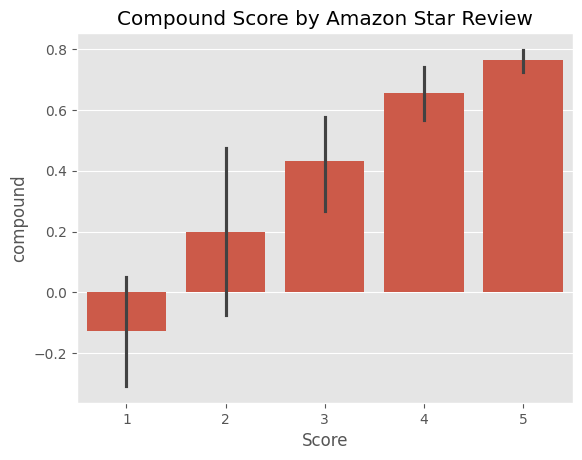

In [27]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')

This plot confirms our assumptions. As we see, the more positive that the `compound` values reach, correlates with the higher star `Score`. As the `compound` values starts at a lower, even negative value, we see that it is inline with the lower star `Score` of 1.

Now, let's look at the positive, neutral, and negative scores of each

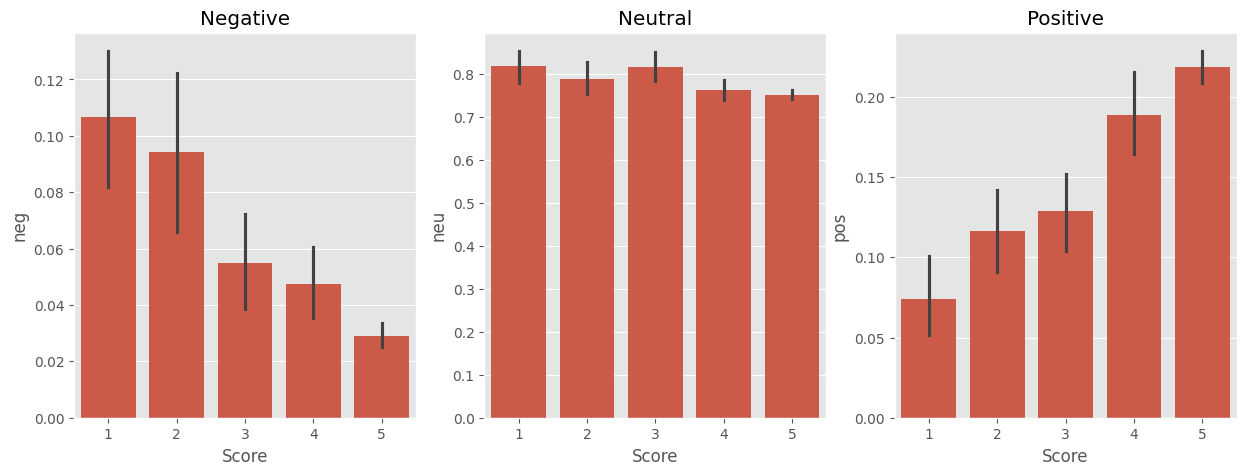

In [28]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='neg', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score', y='pos', ax = axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.tight_layout
plt.show()


Thus, while the neutral plot stays decently flat, we can confirm our assumptions. <br>

As a `text` review becomes less negative, we note that the star `Score` increases. <br>
As a `text` review becomes more positive, we note that the star `Score` increases. <br>

# Step 3: Roberta Pretrained Model
* Use a model trained of a large corpus of data
* Transformer model accounts for not only the words, but also the context related to other words

First, let's import the necessary packages from huggingface (aka transformers) as well as `softmax` which we will apply to the outputs as they do not have `softmax` already applied (will smooth out between 0 and 1).

In [37]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


Next, we are going to pull in a very specific model that has been previously pretrained on a large amount of data

In [40]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\arman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arman\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Now we have a model and a tokenzier that we can apply to the text.

In [41]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [44]:
# Run for Roberta Model

# First we encode the text, with a tokenizer, so that the model will be able to understand via embeddings
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
# Then, we take the output and convert it from a tensor to numpy so that we can store it locally
scores = output[0][0].detach().numpy()
# Last, we apply the softmax to the scores
scores = softmax(scores)
scores

array([0.97635514, 0.02068747, 0.00295737], dtype=float32)

From the numpy array that was printed, we see three different scores. Note that this is similar to the VADERS approach that we previously ran as the array is formatted as such: <br>
[neg, neu, pos]

Thus, let's create a dictionary of the scores and properly name them for convenience and usability. 

In [46]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573692}


From the roberta model scores, we can see that it is much more accurate at scoring the neg, neu, and pos values of the example than the VADER model.

Now, let's run the entire dataset.

First, we create the function that we will use for roberta

In [48]:
def polarity_scores_roberta(example):
    # First we encode the text, with a tokenizer, so that the model will be able to understand via embeddings
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    # Then, we take the output and convert it from a tensor to numpy so that we can store it locally
    scores = output[0][0].detach().numpy()
    # Last, we apply the softmax to the scores
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
    return scores_dict

Now, let's only run one loop to see some inital results.

In [49]:
# Run the polarity score on the entire dataset
# Dictionary for results
res = {}
for i, row in tqdm(df.iterrows(), total =len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    break

  0%|          | 0/500 [00:00<?, ?it/s]

In [50]:
vader_result

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [51]:
roberta_result

{'roberta_neg': 0.009624222,
 'roberta_neu': 0.049980354,
 'roberta_pos': 0.94039536}

This is exactly the ouput that we were looking for, thus let's now combine these dictionaries as well as rename the results for vader to vader_neg, vader_neu, vader_pos

In [53]:
# Run the polarity score on the entire dataset
# Dictionary for results
res = {}
for i, row in tqdm(df.iterrows(), total =len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {} # Creates empty dictionary from the renamed results of vader
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value  # This renames the results to vader_neg, vader_neu, vader_pos

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    break

  0%|          | 0/500 [00:00<?, ?it/s]

Now let's run through one iteration again to view our results and make sure that everything looks up to par for what we are seeking with the entire dataset

In [54]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441,
 'roberta_neg': 0.009624222,
 'roberta_neu': 0.049980354,
 'roberta_pos': 0.94039536}

From this first iteration, we have achieved what we were looking for in terms of formatting, style, and order. <br>
Let's move on to the entire dataset now.

In [55]:
# Dictionary for results
res = {}
for i, row in tqdm(df.iterrows(), total =len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {} # Creates empty dictionary from the renamed results of vader
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value  # This renames the results to vader_neg, vader_neu, vader_pos

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both #to store

  0%|          | 0/500 [00:00<?, ?it/s]

RuntimeError: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]

We ran into an error in one of our iterations as the size of the text was too large for the model to perform efficiently. <br>
Thus, we will edit our code with a try and except clause to bypass these difficult text observations for maximum efficiency while still printing out the ids that we needed to bypass for further understanding.

In [74]:
# Dictionary for results
res = {}
miss = []
for i, row in tqdm(df.iterrows(), total =len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {} # Creates empty dictionary from the renamed results of vader
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value  # This renames the results to vader_neg, vader_neu, vader_pos

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both #to store
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


Note that speed may be affected, GPU will run the model to completition more efficiently than CPU.

Now we will manipulate this dictionary into a pands dataframe for easier usability.

In [64]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index': 'Id'})

After we have merged the original dataset with the results of the roberta and vader models, we can take a look at some of the observations.

In [67]:
results_df = results_df.merge(df, how = 'left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Compare Scores between models

We will compare the scores between VADER and Roberta models using seaborn's pair plot, which let's us compare between each observation and what each feature looks like.

C:\Users\arman\AppData\Local\Temp\ipykernel_1696\2536003697.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


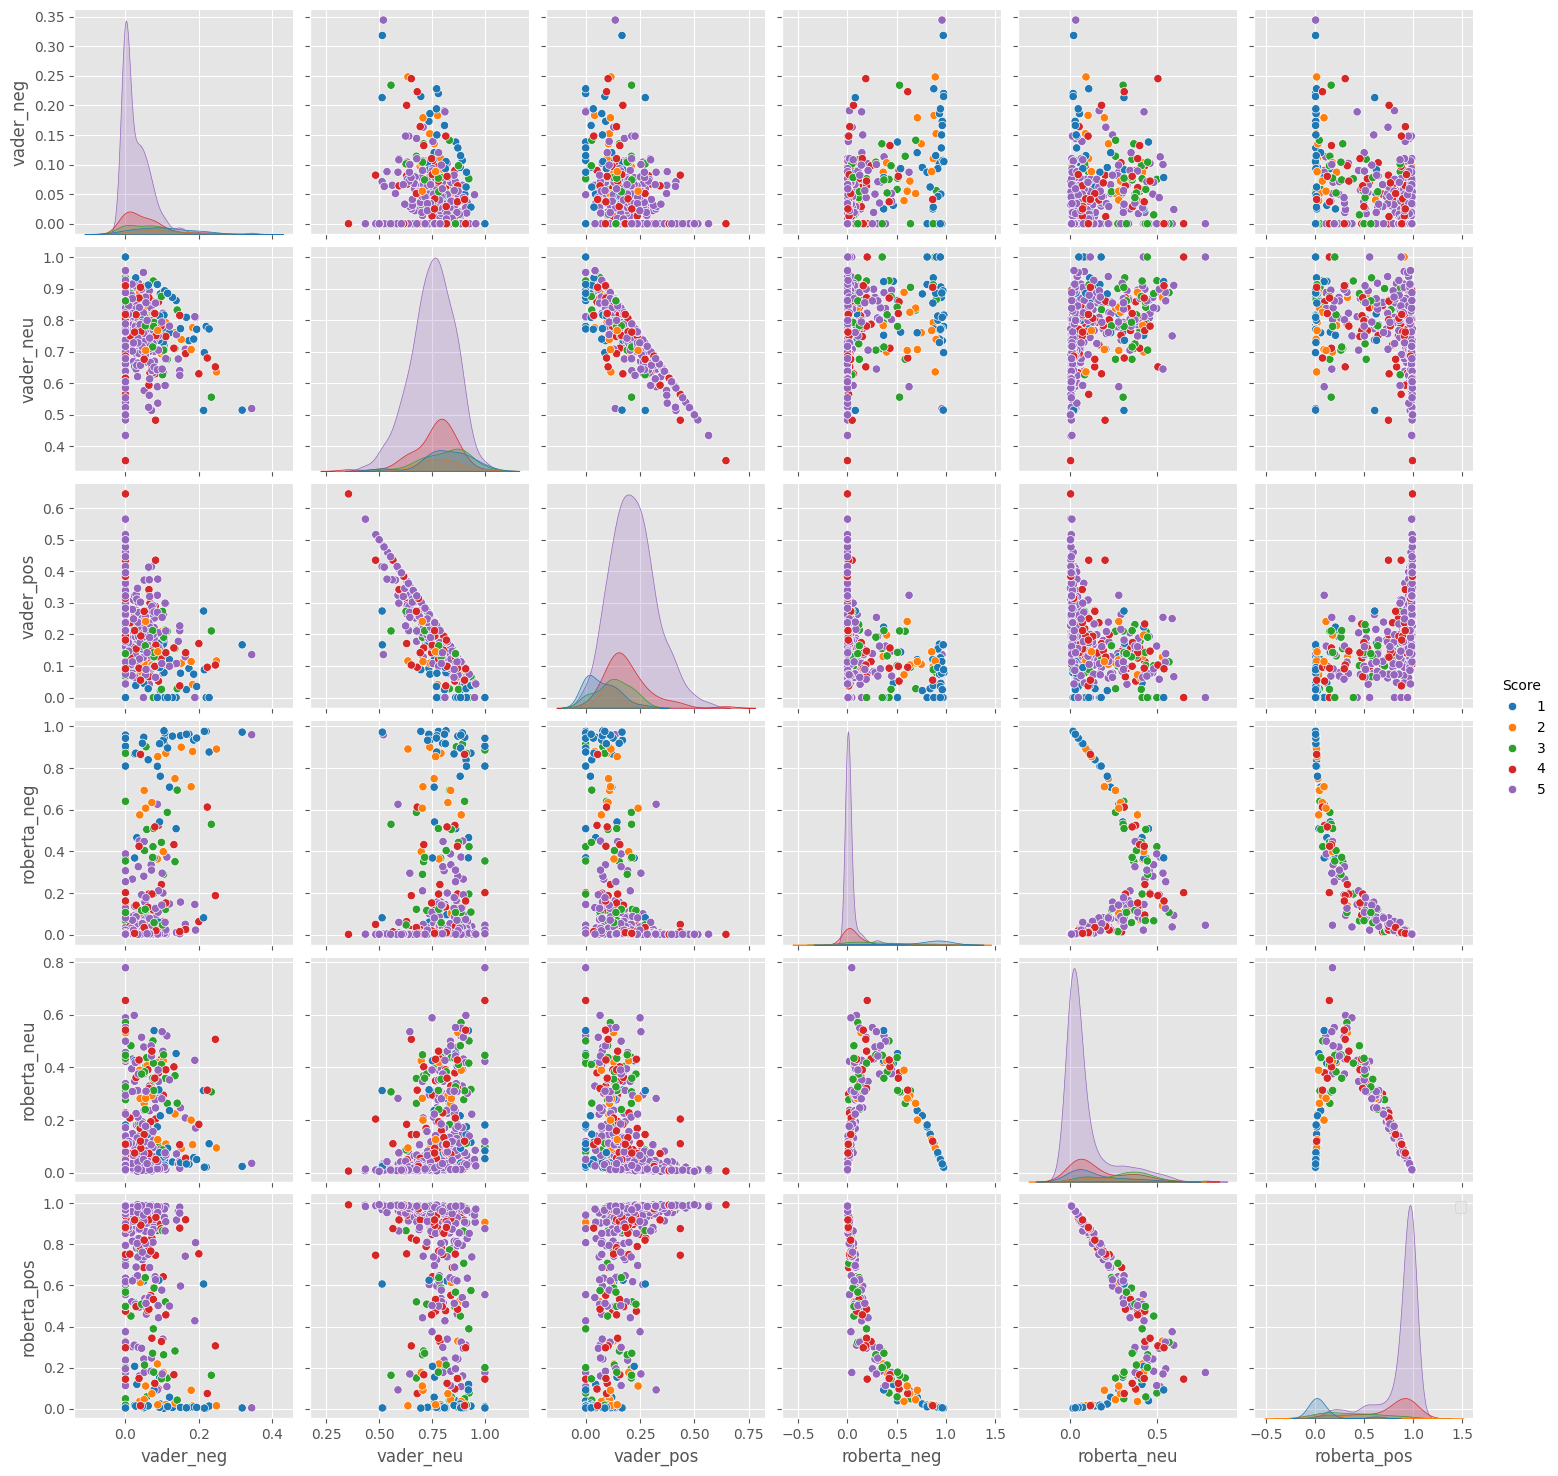

In [78]:
sns.pairplot(data=results_df, vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
       hue = 'Score',
       palette = 'tab10')
plt.show()

Notice: The purple color represents 5 star reviews.
In a summarization of the plots, the VADER model is much less confident in its predictions, as noted but the larger area under each curve in comparison to the Roberta model

In terms of our proposition about low scores correlating with negative reviews, and high scores correlating with positive reviews, it is also show that the Roberta model follows this proposition.

# Step 4: Example

Let's look at some examples where the model scoring and review score differ the most.

First, we will look at the highest Roberta positive values with `Score` = 1 in decending order.

In [82]:
results_df.query('Score == 1 ').sort_values('roberta_pos', ascending = False)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
252,255,0.091,0.736,0.172,0.4118,0.059614,0.314749,0.625637,B0048IC328,A1W867A8DSHFHC,no name,1,3,1,1339804800,Don't Waste Your Money,"I felt energized within five minutes, but it l..."
206,209,0.050,0.820,0.130,0.8913,0.095905,0.282240,0.621856,B0028C44Z0,A3BJ9NS09YGQT5,"Atl Chris ""Atl Chris""",0,3,1,1314489600,These just don't do it for me as breath mints,"To me, these are nothing like the regular Alto..."
322,325,0.213,0.514,0.274,0.3185,0.081018,0.311803,0.607179,B000JEHAHS,A2CU16YU1KEOUY,"Hurricane Ridge ""Chris""",5,19,1,1168300800,Never Arrived,So we cancelled the order. It was cancelled w...
163,165,0.025,0.752,0.223,0.8957,0.368308,0.425197,0.206494,B000ITVLE2,ARTBQH9WOZTIV,"Billy Wilson ""amzrview""",0,4,1,1269216000,Tasteless but low calorie,Seriously this product was as tasteless as the...
73,74,0.093,0.762,0.144,0.9665,0.541301,0.304906,0.153794,B0059WXJKM,A25VFHVGI4CFTP,Diana Robinson,0,1,1,1335744000,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...
12,13,0.031,0.923,0.046,0.2960,0.466125,0.415259,0.118616,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
214,217,0.078,0.922,0.000,-0.2960,0.368826,0.539683,0.091491,B002TDK0VK,A3GRP8QRFGDH8T,Technically Proficient,1,4,1,1296086400,Price cannot be correct,"Hey, the description says 360 grams - that is ..."
152,154,0.120,0.760,0.120,0.2502,0.708370,0.235633,0.055998,B002HQAXUW,A17ESTP5T7T1PH,Bumbeda1,1,1,1,1324944000,Rip off Price,These singles sell for $2.50 - $3.36 at the st...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
211,214,0.095,0.883,0.022,-0.9726,0.760797,0.216119,0.023083,B0009XLVGA,A1NHQNQ3TVXTZF,"Desert Girl ""chrissylovesherhusband""",3,10,1,1220227200,CHANGED FORMULA MAKES CATS SICK!!!!,"As with canidae, Felidae has also changed thei..."


Now, we will look at the observation with the highest positivity value produced by Roberta with a `Score` = 1

In [83]:
results_df.query('Score == 1 ').sort_values('roberta_pos', ascending = False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

This is somewhat of an interesting review as it does not become negative until the end, thus we  can see the model getting somewhat confused by the verbage.

Now, let's look at the same instance, but with VADER scoring the positivity instead

In [86]:
results_df.query('Score == 1 ').sort_values('vader_pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Once again, a bit of character (and possibly sarcasm) we can witness some of the model's flaws with picking up on emotional dialect.

---

### Negative Sentiment with 5-Star Review

Now, let's look on the flipside, the observation that recieved the highest negativity value from Roberta but had a `Score` = 5

In [84]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [85]:
results_df.query('Score == 5').sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

Both models happen to score the exact same observation the same. Both models believe the statements as negative sentiment.

# Hugging Face Transformers Pipelines

Quick and Easy alternative for sentiment predictions

In [87]:
from transformers import pipeline

In [88]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\arman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arman\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.war

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [89]:
sent_pipeline('Sentiment analysis is hard')

[{'label': 'NEGATIVE', 'score': 0.9991359114646912}]

Now, let's apply the pipeline to our dataset and merged it with the dataset that currently contains the original data as well as the sccores produced by VADER and Roberta

In [105]:

# Initialize the sentiment analysis pipeline
sent_pipeline = pipeline('sentiment-analysis')

# Function to apply the sentiment analysis pipeline and format results
def get_sentiment(text):
    try:
        # Truncate the text if it's too long to fit within the model's token limit
        text = text[:512]
        result = sent_pipeline(text)[0]
        return result['label'], result['score']
    except RuntimeError as e:
        print(f"Error processing text: {e}")
        return None, None

# Apply the function to each row in the 'text' column
results_df[['pipe_label', 'pipe_score']] = results_df['Text'].apply(
    lambda x: pd.Series(get_sentiment(x))
)


# Save the formatted results in a new DataFrame called pipe_df
pipe_df = results_df.copy()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


   Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0   1      0.000      0.695      0.305          0.9441     0.009624   
1   2      0.138      0.862      0.000         -0.5664     0.508986   
2   3      0.091      0.754      0.155          0.8265     0.003229   
3   4      0.000      1.000      0.000          0.0000     0.002295   
4   5      0.000      0.552      0.448          0.9468     0.001635   

   roberta_neu  roberta_pos   ProductId          UserId  \
0     0.049980     0.940395  B001E4KFG0  A3SGXH7AUHU8GW   
1     0.452414     0.038600  B00813GRG4  A1D87F6ZCVE5NK   
2     0.098067     0.898704  B000LQOCH0   ABXLMWJIXXAIN   
3     0.090219     0.907486  B000UA0QIQ  A395BORC6FGVXV   
4     0.010302     0.988063  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"    

In [106]:
pipe_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,pipe_label,pipe_score
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,POSITIVE,0.998385
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIVE,0.999525
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,POSITIVE,0.999765
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,POSITIVE,0.999153
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,POSITIVE,0.998708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,POSITIVE,0.999860
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,POSITIVE,0.999754
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,POSITIVE,0.999402
496,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",POSITIVE,0.992952


Let's looks at the same plots we looked at previously

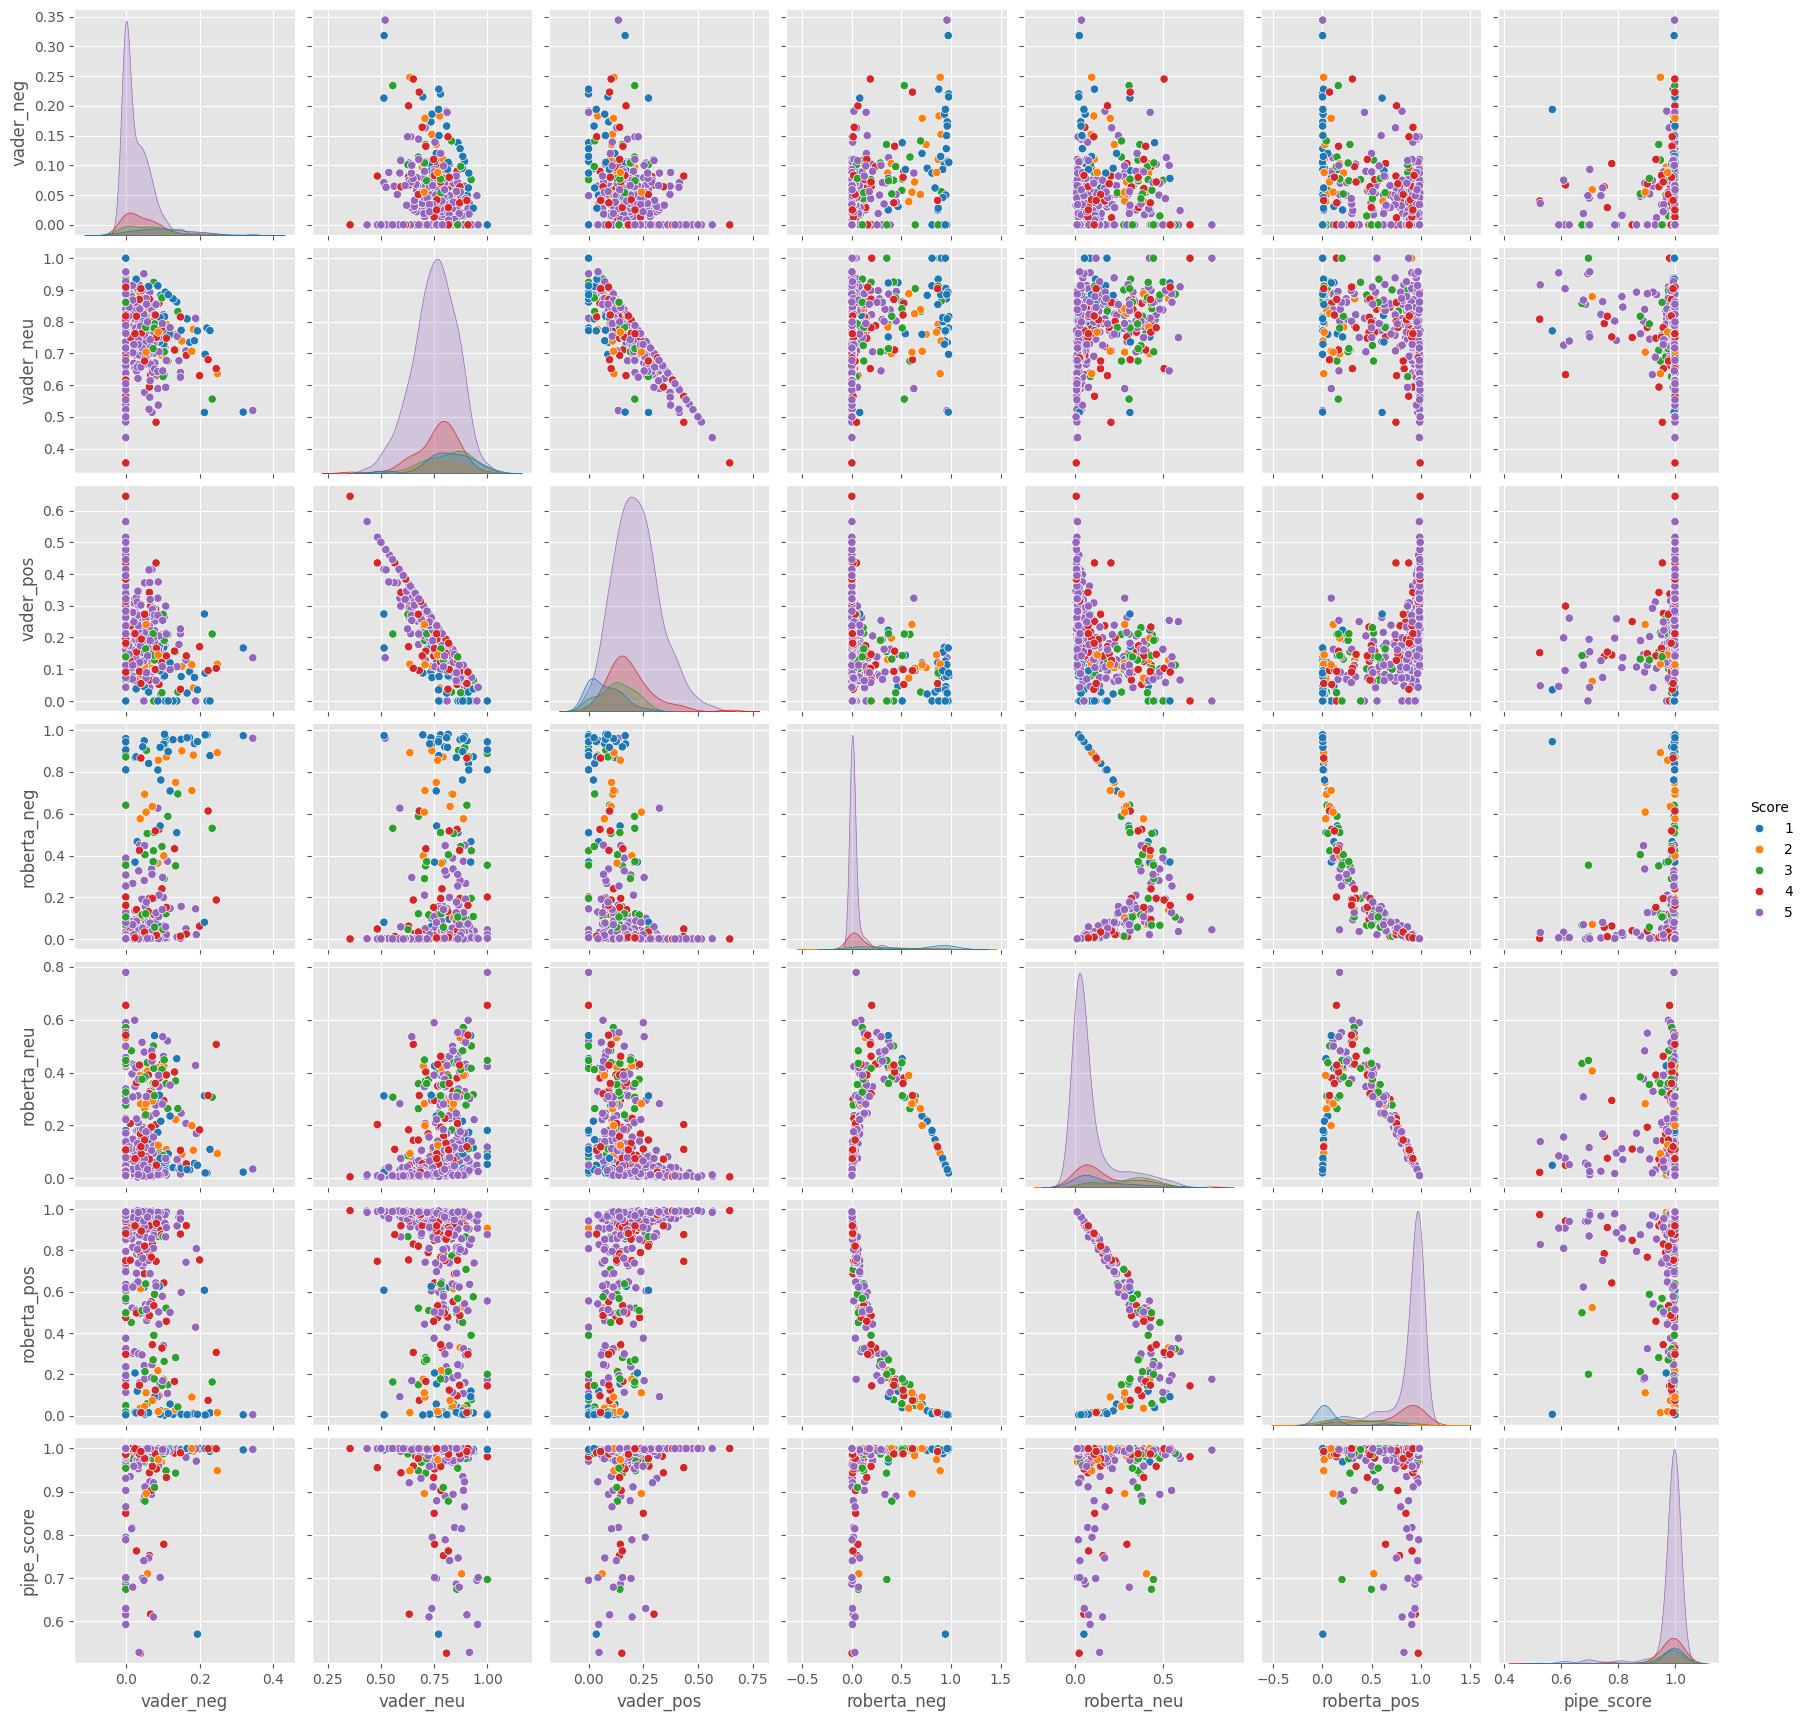

In [108]:
sns.pairplot(data=pipe_df, vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'pipe_score'],
       hue = 'Score',
       palette = 'tab10')
plt.show()

The pipeline seems to be extremely confident in its scoring, let's see if there any difference in terms of our examples

In [111]:
pipe_df.query('Score == 1 and pipe_label == "POSITIVE"')['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Interesting to note that both the Roberta model and the pipeline produced that same observation as positive incorrectly.

In [112]:
pipe_df.query('Score == 5 and pipe_label == "NEGATIVE"')['Text'].values[0]

"One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week."

Also interesting is how pipeline notes this as a negative review due to the amount of negative verbage that is used, however in the grander context the reviewer saw this negative language as a positive.

___

Thus, we have completed sentiment analysis for this dataset!

# The End